# <center> Création d'un premier réseau de neurones </center>

**Sources :** 

- Cours d'Openclassrooms : https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4732186-empilez-les-perceptrons
- Corrigé du cours : https://colab.research.google.com/github/OpenClassrooms-Student-Center/4470406-utilisez-des-modeles-supervises-non-lineaire/blob/main/notebooks/Classify_ECG_neural_network.ipynb#scrollTo=58e81d61
- Tutoriel Keras : https://keras.io/guides/sequential_model/

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib as plt

#Suppression des erreurs de type warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Préparation du csv

Il n'y pas de nom de colonnes. Nous ajoutons des noms : 'col 1', 'col 2'... + une dernière colonne 'Classe' (0/1)

In [2]:
df = pd.read_csv("ecg.csv", names = )
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


### On renomme la dernière colonne en 'Classe' :

In [11]:
df.rename(columns={'1.0':'Classe'}, inplace=True)

### On sélectionne les colonnes restantes pour les modifier avec une boucle for

In [17]:
test = df.iloc[:, :-1]

In [81]:
index = 1
for x in test.columns :
    nom_colonne = 'col ' + str(index)
    test.rename(columns={x:nom_colonne}, inplace=True)
    index += 1

In [37]:
test.head()

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,...,col 132,col 133,col 134,col 135,col 136,col 137,col 138,col 139,col 140,Classe
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


### On ajoute la colonne 'Classe' au df modifié

In [24]:
test1 = df['Classe']

In [27]:
test1 = pd.DataFrame(test1)

In [32]:
test['Classe'] = test1

## On sauvegarde le dataframe dans un csv

In [34]:
test.to_csv("df.csv", index=False)

## Chargement des données

In [7]:
df = pd.read_csv("df.csv")
df.head()

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,...,col 132,col 133,col 134,col 135,col 136,col 137,col 138,col 139,col 140,Classe
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


## Analyse des données

In [8]:
df.describe()

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,...,col 132,col 133,col 134,col 135,col 136,col 137,col 138,col 139,col 140,Classe
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,...,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,-0.262532,-1.649593,-2.492366,-3.119508,-3.167414,-2.866184,-2.272863,-1.797750,-1.409816,-0.935898,...,0.071168,-0.062821,-0.276300,-0.507968,-0.761527,-0.835386,-0.642892,-0.487950,-0.706754,0.583950
std,1.152563,1.445591,1.386477,1.302936,1.104513,0.906362,0.731666,0.622856,0.636923,0.657822,...,1.404529,1.646210,1.894644,2.059515,2.086289,2.056447,1.859564,1.831162,1.414498,0.492951
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004439,-2.701395,-3.667851,-4.227203,-4.007389,-3.480760,-2.779853,-2.165844,-1.773994,-1.362007,...,-1.088029,-1.588688,-2.147271,-2.731039,-3.031581,-2.868739,-2.155084,-1.658548,-1.596867,0.000000
50%,-0.297583,-1.661891,-2.585872,-3.388020,-3.468898,-2.946908,-2.285430,-1.750063,-1.422461,-0.910449,...,0.658234,0.717676,0.604723,0.333481,-0.030771,-0.202761,-0.194480,-0.160768,-0.568775,1.000000
75%,0.500057,-0.677702,-1.514058,-2.235425,-2.531019,-2.398789,-1.823473,-1.483699,-1.063533,-0.476386,...,1.169415,1.238671,1.264441,1.234413,1.034046,0.945220,0.951666,1.002628,0.271822,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


### Répartition des classes :

La classe "1" est légèrement sureprésentée.

In [9]:
df.Classe.value_counts()

1.0    2918
0.0    2079
Name: Classe, dtype: int64

<AxesSubplot: ylabel='None'>

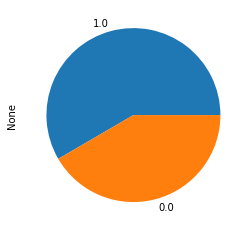

In [13]:
df.value_counts("Classe", ascending = False).plot.pie(legend=False)

### Conversion de la colonne "Classe" en *int*

In [14]:
df.Classe = df.Classe.astype(int)

---

## Fragmentation des données en jeu d'entraînement et de test

### Création de X et y

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("X shape :", X.shape)
print("y shape :", y.shape)

X shape : (4997, 140)
y shape : (4997,)


### Split Train/Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
liste = [X_train, X_test, y_train, y_test]

for x in liste :
    print(x.shape)

(3997, 140)
(1000, 140)
(3997,)
(1000,)


## Conception du modèle

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [39]:
# Création des couches cachées 

model = models.Sequential()
# dimension des données d'entrées = nombre de colonnes de X_train
model.add(keras.Input(shape=(140)))
# ajout des couches
model.add(layers.Dense(140, input_dim=2, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))
# ajout de paramètres
model.compile(metrics=['accuracy'],
                  loss='binary_crossentropy',
                  optimizer='adam')

In [40]:
# couches du modèle
model.layers

In [43]:
# information sur le modèle 
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 140)               19740     
                                                                 
 dense_15 (Dense)            (None, 1)                 141       
                                                                 
Total params: 19,881
Trainable params: 19,881
Non-trainable params: 0
_________________________________________________________________


## Entraînement du modèle

In [44]:
history = model.fit(
    X_train,
    y_train,
    batch_size=2,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
#     validation_data=(x_val, y_val),
)

Epoch 1/50
1999/1999 [==============================] - 9s 2ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 2/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9907
Epoch 3/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.0271 - accuracy: 0.9925
Epoch 4/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9927
Epoch 5/50
1999/1999 [==============================] - 5s 3ms/step - loss: 0.0216 - accuracy: 0.9945
Epoch 6/50
1999/1999 [==============================] - 5s 3ms/step - loss: 0.0196 - accuracy: 0.9945
Epoch 7/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9955
Epoch 8/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.0161 - accuracy: 0.9967
Epoch 9/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.0151 - accuracy: 0.9962
Epoch 10/50
1999/1999 [==============================] - 4s 2ms/step - loss: 0.014

## Evaluation du modèle

In [45]:
y_pred = model.predict(X_test)

32/32 [==============================] - 4s 2ms/step


In [48]:
# évaluation
result = model.evaluate(X_test, y_test, verbose=1)

# On peut extraire la "metrics" choisie
accuracy = result[1]

print(f"La précision de notre modèle est de {round(accuracy*100,2)} %")

32/32 [==============================] - 0s 2ms/step - loss: 0.0983 - accuracy: 0.9870
La précision de notre modèle est de 98.7 %
